<a href="https://colab.research.google.com/github/bilalProgTech/mtech-nmims/blob/master/deep-learning/Lab-Work/20220724-Lab-2-MTech-DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import tensorflow as tf
import numpy as np

# Computer Vision using DNN

In [ ]:
mnist = tf.keras.datasets.fashion_mnist

In [ ]:
(training_images, training_labels), (testing_images, testing_labels) = mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
training_images.shape

(60000, 28, 28)

In [ ]:
training_labels.shape

(60000,)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

    '0':'T-shirt/Top', 
    '1':'Trouser', 
    '2':'Pullover', 
    '3':'Dress', 
    '4':'Coat', 
    '5':'Sandal',
    '6':'Shirt', 
    '7':'Sneaker', 
    '8':'Bag', 
    '9':'Ankle Boot'

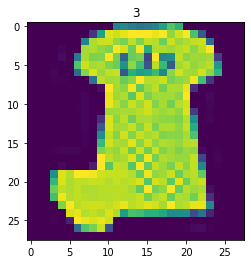

In [ ]:
plt.imshow(training_images[70])
plt.title(training_labels[70])
plt.show()

In [ ]:
training_images[70]

In [ ]:
training_images = training_images / 255
testing_images = testing_images / 255

In [ ]:
training_images[70]

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.InputLayer(input_shape=(28, 28)),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dense(len(np.unique(training_labels)), activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(training_images, training_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4996 - accuracy: 0.8236
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3785 - accuracy: 0.8653
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3389 - accuracy: 0.8765
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3141 - accuracy: 0.8849
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2978 - accuracy: 0.8898
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2814 - accuracy: 0.8959
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2680 - accuracy: 0.8991
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2581 - accuracy: 0.9041
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2490 - accuracy: 0.9081
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.241

In [ ]:
prob = model.predict(testing_images)
pred = np.argmax(prob, axis=1)

In [ ]:
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix

In [ ]:
print(accuracy_score(testing_labels, pred))

0.8727


In [ ]:
print(log_loss(testing_labels, prob))

0.35366442382674995


In [ ]:
model.evaluate(testing_images, testing_labels)

313/313 [==============================] - 2s 5ms/step - loss: 0.3537 - accuracy: 0.8727


[0.35366448760032654, 0.8726999759674072]

In [ ]:
import seaborn as sns

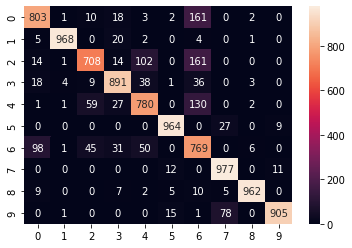

In [ ]:
sns.heatmap(confusion_matrix(testing_labels, pred), annot=True, fmt='g')
plt.show()

# Convolution and Pooling

In [1]:
import cv2

In [2]:
img = cv2.imread('/content/Untitled.png', 0)
img.shape

(450, 450)

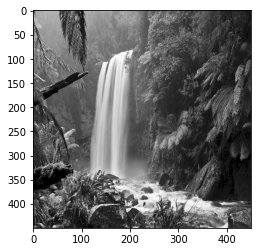

In [7]:
plt.gray()
plt.imshow(img)

In [10]:
img_transformed = np.copy(img)
size_x = img_transformed.shape[0]
size_y = img_transformed.shape[1]

In [11]:
filter = [[-1,0,1], [-2,0,2], [-1,0,1]]
weight = 0.9
#filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]]
#filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
filter

[[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]

In [12]:
for x in range(1, size_x-1):
  for y in range(1, size_y-1):
    conv = 0
    conv = conv + (img[x-1, y-1] * filter[0][0])
    conv = conv + (img[x, y-1] * filter[0][1])
    conv = conv + (img[x+1, y-1] * filter[0][2])
    conv = conv + (img[x-1, y] * filter[1][0])
    conv = conv + (img[x, y] * filter[1][1])
    conv = conv + (img[x+1, y] * filter[1][2])
    conv = conv + (img[x-1, y+1] * filter[2][0])
    conv = conv + (img[x, y+1] * filter[2][1])
    conv = conv + (img[x+1, y+1] * filter[2][2])
    conv = conv * weight
    if conv <0:
      conv = 0
    if conv>255:
      conv = 255
    img_transformed[x, y] = conv

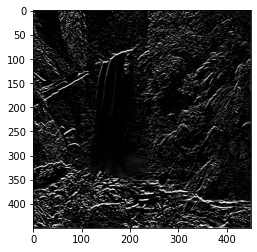

In [13]:
plt.gray()
plt.imshow(img_transformed)
plt.show()

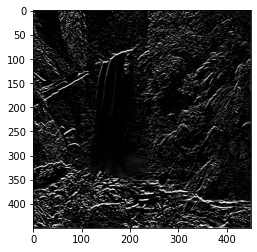

In [14]:
plt.gray()
plt.imshow(img_transformed)
plt.show()

In [15]:
450/2

225.0

In [16]:
new_x = int(size_x/2)
new_y = int(size_y/2)
pooling_image = np.zeros((new_x, new_y))
pooling_image

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
new_x = int(size_x/2)
new_y = int(size_y/2)
pooling_image = np.zeros((new_x, new_y))
for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):
    pixels = []
    pixels.append(img_transformed[x, y])
    pixels.append(img_transformed[x+1, y])
    pixels.append(img_transformed[x, y+1])
    pixels.append(img_transformed[x+1, y+1])
    pixels.sort(reverse=True)
    pooling_image[int(x/2), int(y/2)] = pixels[0]

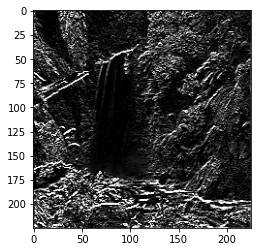

In [19]:
plt.gray()
plt.imshow(pooling_image)
plt.show()

# CNN Model in MNIST

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.InputLayer(input_shape=(28, 28, 1)),
                             tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(16, activation='relu'),
                             tf.keras.layers.Dense(len(np.unique(training_labels)), activation='softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 2704)              0         
                                                                 
 dense_4 (Dense)             (None, 16)                43280     
                                                                 
 dense_5 (Dense)             (None, 10)                170       
                                                                 
Total params: 43,610
Trainable params: 43,610
Non-trainable params: 0
__________________________________________________

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(training_images, training_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.4733 - accuracy: 0.8317
Epoch 2/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3155 - accuracy: 0.8882
Epoch 3/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2813 - accuracy: 0.8995
Epoch 4/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2617 - accuracy: 0.9061
Epoch 5/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2460 - accuracy: 0.9114
Epoch 6/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2308 - accuracy: 0.9168
Epoch 7/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2165 - accuracy: 0.9224
Epoch 8/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2072 - accuracy: 0.9246
Epoch 9/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1958 - accuracy: 0.9296
Epoch 10/10
1875/1875 [==============================] - 25s 13m

In [ ]:
model.evaluate(testing_images, testing_labels)

313/313 [==============================] - 2s 7ms/step - loss: 0.2791 - accuracy: 0.9007


[0.2791118025779724, 0.9006999731063843]

0.9007
0.27911165800119686


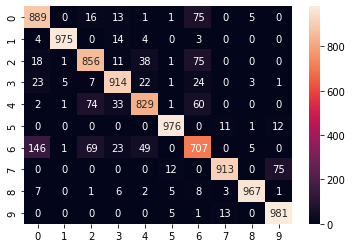

In [ ]:
y_prob = model.predict(testing_images)
y_pred = np.argmax(y_prob, axis=1)
print(accuracy_score(testing_labels, y_pred))
print(log_loss(testing_labels, y_prob))
sns.heatmap(confusion_matrix(testing_labels, y_pred), annot=True, fmt='g')